In [1]:
from functions import *
from parameters_GaAs_QW import *
#from parameters import t_list as t
import pickle
import colorsys
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgb
import matplotlib as mpl 
import matplotlib.pyplot as plt
import math

In [3]:
E_1 =[10, 30, 60, 90]
i = 0
t_probe = t_pump + 4000
for field in E_1:
    i+=1
    with open('results/gain/_d_cv=0.87_gamma_lattice=0.0007596334480560127_no_induced_emdt=4000_E_pump={}_linear_power_conversion_factor=0.0038_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=False_Ps.pickle'.format(field), 'rb') as input_file:
        P_ts = pickle.load(input_file)     
    absorption_probe = get_absorption_probe(P_ts[2], t_probe, tlist,omega_list, E_probe, sigma_probe, omega_probe, n_medium, pulse_shape = 'gauss', method = '1-R-T')
    #abs_LB.append(get_absorption_MQW(pol_linear, t_c, tlist, omega_list, pulse_strength, sigma, n_surrounding, n_medium, z_2, spacing, spacing_0, omega_0, reflections, pulse_shape, method = 'lambert_beer'))
    with open('results/gain/_d_cv=0.87_gamma_lattice=0.0007596334480560127_no_induced_emdt=4000_E_pump={}_linear_power_conversion_factor=0.0038_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=False_absorption_1RT.pickle'.format(field), 'wb') as output_file:
        pickle.dump(absorption_probe, output_file)
    print('done {}/{}'.format(i, len(E_1)))

done 1/4
done 2/4


KeyboardInterrupt: 

In [4]:
qlist = (np.linspace(1.5/700, 1.5, 700))**2/(1.5)
rel_str = 'False'
#E_1 =[0.037,0.11,0.221,0.55]
#E_1 =[0.037,0.11,0.221, 0.333]
E_1 =[10, 30, 60, 90]
Qdim = '700'
n_distr =[]
spectra =[]  
for i, field in enumerate(E_1):
   # with open(r"results/gain/dt=4000.0_E_pump={}_sqrt_power_conversion_factor=0.15_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel={}_absorption_probe.pickle".format(field, rel_str), 'rb') as output_file:
    #    spectrum = pickle.load(output_file)

  #  with open(r"results/gain/dt=4000.0_E_pump={}_sqrt_power_conversion_factor=0.15_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel={}_nsattprobe.pickle".format(field, rel_str), 'rb') as output_file:
       # n_dis = pickle.load(output_file)
    
    with open(r"results/gain/_d_cv=0.87_gamma_lattice=0.0007596334480560127_no_induced_emdt=4000_E_pump={}_linear_power_conversion_factor=0.0038_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=False_absorption_1RT.pickle".format(field), 'rb') as output_file:
        spectrum = pickle.load(output_file)

    with open(r"results/gain/_d_cv=0.87_gamma_lattice=0.0007596334480560127_no_induced_emdt=4000_E_pump={}_linear_power_conversion_factor=0.0038_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=False_nsattprobe.pickle".format(field), 'rb') as output_file:
        n_dis = pickle.load(output_file)

     #   with open(r"results/dt={}_E1={}_Qdim={}_Qmax=1.5{}_ndistr_att2.pickle".format(delta_t, field, Qdim, comments), 'rb') as output_file:
      #      n_dis = pickle.load(output_file)

       # with open(r"results/dt={}_E1={}_Qdim={}_Qmax=1.5{}_absorption_probe.pickle".format(delta_t, field, Qdim, comments), 'rb') as output_file:
        #    spectrum = pickle.load(output_file)

    
    n_distr.append(n_dis)
    spectra.append(spectrum)


In [5]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

# Funktion zum Reduzieren der Sättigung
def desaturate_color(color, factor=0.9):
    # Konvertiere die Farbe in den RGB-Farbraum
    r, g, b = to_rgb(color)
    # Konvertiere die Farbe in den HSV-Farbraum
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    # Reduziere die Sättigung
    s *= factor
    # Konvertiere die Farbe zurück in den RGB-Farbraum
    desaturated_color = colorsys.hsv_to_rgb(h, s, v)
    return desaturated_color

jet_map = plt.get_cmap('plasma')
new_colors = jet_map(np.linspace(0, 1, 5))
new_color =[desaturate_color(new_colors[i]) for i in range(5)]
SMALL_SIZE = 13
MEDIUM_SIZE = 13
BIGGER_SIZE = 14
LW = 2

lowred = desaturate_color('red')
lowblue = desaturate_color('blue')

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

linestyles =['-',':', '--','-.']#, ''] 
dashlist = [(5,2),(2,2),(1,2,4,2),(1,1), (2,5), (1,2,2,2), (3,2,2)]
#colorlist =['firebrick', 'green'] 
mpl.rcParams['mathtext.default'] = 'regular'

/tmp/ipykernel_3327355/358353331.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(hbar*(omega_list + E_G/hbar- 0.012903883497007542), absorption_probe, '-', label = r'0 uW', linewidth = LW, linestyle = '-', color = 'dimgrey')


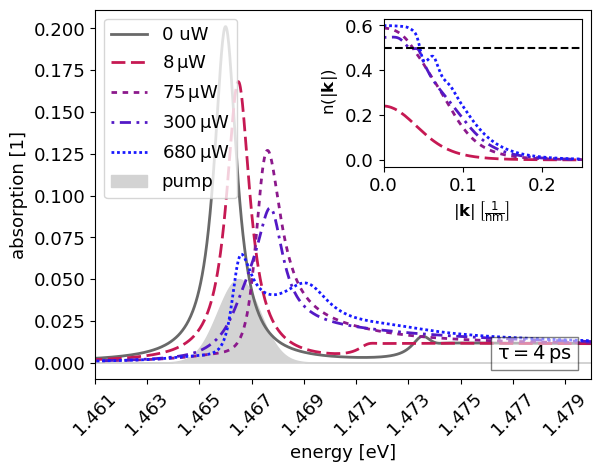

In [6]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots()
powers = np.array([8, 75, 300, 680])
with open(r"results//gain/_d_cv=0.87_gamma_lattice=0.0007596334480560127_no_induced_emdt=4000_E_pump=0_linear_power_conversion_factor=0.0038_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=False_absorption_probe.pickle", 'rb') as output_file:
    absorption_probe = pickle.load(output_file)

ax.plot(hbar*(omega_list + E_G/hbar- 0.012903883497007542), absorption_probe, '-', label = r'0 uW', linewidth = LW, linestyle = '-', color = 'dimgrey')
for i in range(len(spectra)):
    ax.plot(hbar*(omega_list + E_G/hbar- 0.012903883497007542), spectra[i], label = str(math.ceil(powers[i]))+'$\,\mu$W', linewidth = LW, linestyle = '--', dashes = dashlist[i], color = colorFader(lowred,lowblue,(i+1)/(len(spectra))))


ax.fill_between(hbar*(omega_list+ E_G/hbar- 0.012903883497007542), 0.1*np.abs(fouriertrafo(gauss_pulse(tlist, E_0 = 0.5, sigma = sigma_pump, t_center = t_pump,detuning = 0),omega_list, tlist)),color = 'lightgray', label = 'pump')
plt.xlim(1.461, 1.48)
plt.xticks(np.arange(1.461, 1.48, step = 0.002), rotation = 45)
plt.xlabel('energy [eV]')
plt.ylabel('absorption [1]')
plt.legend(loc = 'upper left')

# Inset-Diagramm

ax_inset = inset_axes(ax, width="40%", height="40%", loc='upper right')
for i in range(len(n_distr)):
    ax_inset.plot(qlist[:400] , np.real(n_distr[i][:400] ), label = str(math.ceil(powers[i]))+' uW',  linewidth = LW, linestyle = '--', dashes = dashlist[i], color = colorFader(lowred,lowblue,(i+1)/(len(spectra))))
ax_inset.hlines(0.5, 0.0, 0.25, linestyle = 'dashed', color = 'black')
plt.xlim(0, 0.25)
plt.xlabel(r'$|\mathbf{k}|\, \left[ \frac{1}{nm}\right]   $ ', fontsize = 12)
plt.ylabel(r' $n\left(|\mathbf{k}|\right) $ ' , fontsize = 12)
# Textbox hinzufügen
textstr = r"$\tau = 4\,ps$ "
props = dict(facecolor='white', alpha=0.5)
ax.text(0.81, 0.1, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

#plt.savefig('results/dt={}_Qdim={}_absorption_Efield_dependence_with_inset_lineargrid_withdecay.pdf'.format(delta_t,Qdim),bbox_inches='tight')
#plt.savefig('results/gain/dt=4000.0_Qdim={}_absorption_Efield_dependence_with_inset_squaregrid_withdecay_test.pdf'.format(Qdim),bbox_inches='tight')
plt.savefig('results/gain/dt=4000.0_Qdim=700_absorption_Efield_dependence_with_inset_squaregrid_nodecay_no_induced_em.pdf'.format(Qdim),bbox_inches='tight')


In [38]:
qlist = (np.linspace(1.5/700, 1.5, 700))**2/(1.5)
rel_str = 'False'
E_1 =[30]
d_cv =[0.76, 0.82, 0.87]
gamma_lattice = [0.0009/hbar]
Qdim = '700'
n_distr =[]
spectra =[]  
for i, field in enumerate(E_1):
    dipole_spectra = []
    dipole_ns = []
    for dipole in d_cv:
        gamma_spectra = []
        gamma_ns = []
        for gammas in gamma_lattice:
            with open(r"results/gain/_d_cv={}_gamma_lattice={}_dt=4000_E_pump={}_sqrt_power_conversion_factor=0.15_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=False_absorption_probe.pickle".format(dipole, gammas, field), 'rb') as output_file:
                spectrum = pickle.load(output_file)

            with open(r"results/gain/_d_cv={}_gamma_lattice={}_dt=4000_E_pump={}_sqrt_power_conversion_factor=0.15_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=False_nsattprobe.pickle".format(dipole, gammas, field), 'rb') as output_file:
                n_dis = pickle.load(output_file)
            gamma_spectra.append(spectrum)
            gamma_ns.append(n_dis)
        dipole_spectra.append(gamma_spectra)
        dipole_ns.append(gamma_ns)
    
    n_distr.append(dipole_ns)
    spectra.append(dipole_spectra)

In [15]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

# Funktion zum Reduzieren der Sättigung
def desaturate_color(color, factor=0.9):
    # Konvertiere die Farbe in den RGB-Farbraum
    r, g, b = to_rgb(color)
    # Konvertiere die Farbe in den HSV-Farbraum
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    # Reduziere die Sättigung
    s *= factor
    # Konvertiere die Farbe zurück in den RGB-Farbraum
    desaturated_color = colorsys.hsv_to_rgb(h, s, v)
    return desaturated_color

jet_map = plt.get_cmap('plasma')
new_colors = jet_map(np.linspace(0, 1, 5))
new_color =[desaturate_color(new_colors[i]) for i in range(5)]
SMALL_SIZE = 13
MEDIUM_SIZE = 13
BIGGER_SIZE = 14
LW = 2

lowred = desaturate_color('red')
lowblue = desaturate_color('blue')

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

linestyles =['-',':', '--','-.']#, ''] 
dashlist = [(5,2),(2,2),(1,2,4,2),(1,1), (2,5), (1,2,2,2), (3,2,2)]
#colorlist =['firebrick', 'green'] 
mpl.rcParams['mathtext.default'] = 'regular'

NameError: name 'to_rgb' is not defined

/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


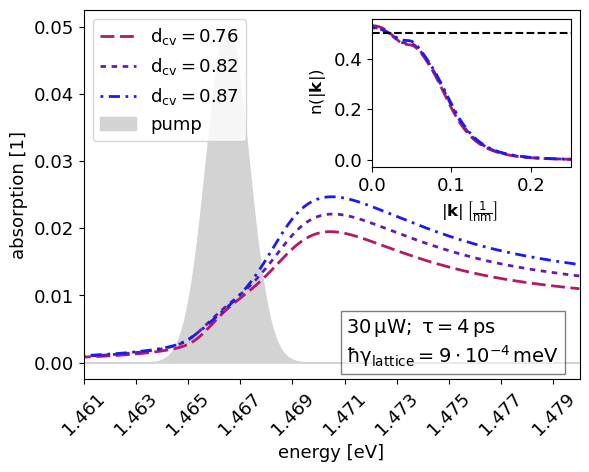

In [40]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots()
powers = np.array(E_1)
#with open(r"results/dt=4000.0_E1=0_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=True_gamma_inter=0.0025_absorption_probe.pickle", 'rb') as output_file:
 #   absorption_probe = pickle.load(output_file)

#ax.plot(hbar*(omega_list + E_G/hbar- 0.012903883497007542), absorption_probe, '-', label = r'0 uW', linewidth = LW, linestyle = '-', color = 'dimgrey')
for i, field in enumerate(E_1):
    for j, dipole in enumerate(d_cv):
        for k, gamma in enumerate(gamma_lattice):
            ax.plot(hbar*(omega_list + E_G/hbar- 0.012903883497007542), spectra[i][j][k], label =r"$d_{cv}=$" + str(dipole) ,linewidth = LW, linestyle = '--', dashes = dashlist[j], color = colorFader(lowred,lowblue,(j+1)/(len(spectra)*len(d_cv)*len(gamma_lattice))))


ax.fill_between(hbar*(omega_list+ E_G/hbar- 0.012903883497007542), 0.1*np.abs(fouriertrafo(gauss_pulse(tlist, E_0 = 0.5, sigma = sigma_pump, t_center = t_pump,detuning = 0),omega_list, tlist)),color = 'lightgray', label = 'pump')
plt.xlim(1.461, 1.48)
plt.xticks(np.arange(1.461, 1.48, step = 0.002), rotation = 45)
plt.xlabel('energy [eV]')
plt.ylabel('absorption [1]')
plt.legend(loc = 'upper left')

# Inset-Diagramm

ax_inset = inset_axes(ax, width="40%", height="40%", loc='upper right')
for i, field in enumerate(E_1):
    for j, dipole in enumerate(d_cv):
        for k, gamma in enumerate(gamma_lattice):
            ax_inset.plot(qlist[:400], n_distr[i][j][k][:400], label = r" $d_{cv}=$" + str(dipole), linewidth = LW, linestyle = '--', dashes = dashlist[j], color = colorFader(lowred,lowblue,(j+1)/(len(spectra)*len(d_cv)*len(gamma_lattice))))
            #ax_inset.plot(qlist[:400] , np.real(n_distr[i][:400] ), label = str(math.ceil(powers[i]))+' uW',  linewidth = LW, linestyle = '--', dashes = dashlist[i], color = colorFader(lowred,lowblue,(i+1)/(len(spectra))))
ax_inset.hlines(0.5, 0.0, 0.25, linestyle = 'dashed', color = 'black')
plt.xlim(0, 0.25)
plt.xlabel(r'$|\mathbf{k}|\, \left[ \frac{1}{nm}\right]   $ ', fontsize = 12)
plt.ylabel(r' $n\left(|\mathbf{k}|\right) $ ' , fontsize = 12)
# Textbox hinzufügen
textstr = r"$30\,\mu\text{W};\;\tau = 4\,ps$"+'\n'+ r"$\hbar\gamma_{lattice}=9\cdot10^{-4}\,meV$ "
props = dict(facecolor='white', alpha=0.5)
ax.text(0.53, 0.17, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

#plt.savefig('results/dt={}_Qdim={}_absorption_Efield_dependence_with_inset_lineargrid_withdecay.pdf'.format(delta_t,Qdim),bbox_inches='tight')
plt.savefig('results/gain/dt=4000.0_Qdim=700_absorption_30W_gamma0.0009_with_inset_squaregrid_nodecay_d_dependency.pdf'.format(Qdim),bbox_inches='tight')


In [22]:
import numpy as np
import matplotlib.pyplot as plt


def read_dat_file(filename):
    """
    Reads a .dat file where:
    - The first entry of each row is the energy.
    - The following entries are the absorption values for corresponding time differences.
    Handles NaN values gracefully.

    Returns:
    - Energies (1D NumPy array)
    - Time differences (1D NumPy array)
    - Absorption values (2D NumPy array)
    """
    with open(filename, 'r', encoding='utf-8-sig') as f:
        # Read the first line to get the time differences (column headers)
        header = f.readline().strip().split()
        time_differences = np.array([float(t) for t in header])

        # Read the remaining data into a NumPy array
        data = np.genfromtxt(f, missing_values='', filling_values=np.nan)

    # Split the data into energies and absorption values
    energies = data[:, 0]  # First column: Energies
    absorption_values = data[:, 1:]  # Remaining columns: Absorption values

    return energies, time_differences, absorption_values

def extract_spectrum_at_time_difference(filename, target_time, energy_min, energy_max):
    """
    Extracts the spectrum at a specific time difference from a .dat file,
    limited to a specific energy range.

    Returns:
    - Filtered energies (1D NumPy array)
    - Spectrum (1D NumPy array)
    """
    energies, time_differences, absorption_values = read_dat_file(filename)

    # Find the index of the target time difference
    time_idx = np.argmin(np.abs(time_differences - target_time))
    spectrum = absorption_values[:, time_idx]

    # Filter by energy range
    energy_mask = (energies >= energy_min) & (energies <= energy_max)
    filtered_energies = energies[energy_mask]
    filtered_spectrum = spectrum[energy_mask]

    return filtered_energies, filtered_spectrum


# Example usage
file_list = [
    "data_gießen/20uW kozirkular.dat",  # Replace with your actual file paths
    "data_gießen/40uW kozirkular.dat",
    "data_gießen/60uW kozirkular.dat",
    "data_gießen/80uW kozirkular.dat",
    "data_gießen/100uW kozirkular.dat"
]
target_time = 4000  # Time difference to extract spectrum
energy_min = 1.460  # Minimum energy
energy_max = 1.480  # Maximum energy
exp_spectra = [extract_spectrum_at_time_difference(file, target_time, energy_min, energy_max) for file in file_list]
#load linear spectrum and pump pulse
file_path = 'data_gießen/2022-05-23 26795 Linabs and Pump.txt'
start = 350
stop = 930

# Load the data from the .txt file into a NumPy array
data = np.loadtxt(file_path)

# If you want to access individual columns, you can slice the array:
energy = data[:, 0][start:stop]
omegas = energy/hbar
absorption = data[:, 1][start:stop]
pulse = data[:, 2][start:stop]


/tmp/ipykernel_3353358/2405494920.py:8: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(energy, absorption, '-', label = r'0 uW', linewidth = LW, linestyle = '-', color = 'dimgrey')


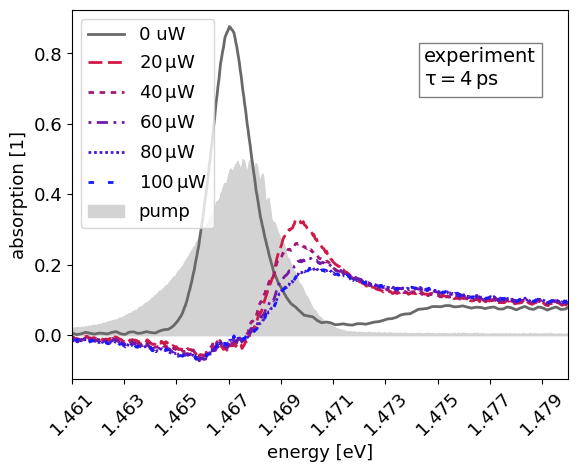

In [33]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots()
LW = 2
str_list = [r"$20\,\mu$W", r"$40\,\mu$W", r"$60\,\mu$W", r"$80\,\mu$W", r"$100\,\mu$W"]
#with open(r"results/dt=4000.0_E1=0_Qdim=700_Qmax=1.5_quadratic_grid_intra_rel=True_gamma_inter=0.0025_absorption_probe.pickle", 'rb') as output_file:
 #   absorption_probe = pickle.load(output_file)

ax.plot(energy, absorption, '-', label = r'0 uW', linewidth = LW, linestyle = '-', color = 'dimgrey')
for i, field in enumerate(exp_spectra):
    ax.plot(field[0], field[1], label =str_list[i] ,linewidth = LW,linestyle = '--', dashes = dashlist[i], color = colorFader(lowred,lowblue,(i+1)/len(str_list)))

ax.fill_between(energy, pulse,color = 'lightgray', label = 'pump')
plt.xlim(1.461, 1.48)
plt.xticks(np.arange(1.461, 1.48, step = 0.002), rotation = 45)
plt.xlabel('energy [eV]')
plt.ylabel('absorption [1]')
plt.legend(loc = 'upper left')
# Textbox hinzufügen
textstr = "experiment\n"+r"$\tau = 4\,ps$ "
props = dict(facecolor='white', alpha=0.5)
ax.text(0.71, 0.9, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Inset-Diagramm


#plt.savefig('results/dt={}_Qdim={}_absorption_Efield_dependence_with_inset_lineargrid_withdecay.pdf'.format(delta_t,Qdim),bbox_inches='tight')
plt.savefig('results/gain/gain_experiment.pdf',bbox_inches='tight')


In [2]:
@jit(nopython = True)
def wannier_matrix(qlist, philist, m_eff, epsilon_s_stat, d): 
    """
    Generates the matrix describing the eigenvalue problem for the Wannier equation

    Parameters:
    -----------
    qlist : list or array-like
        A list of values representing the momentum grid in the q-dimension, assumed equidistant.
    philist : list or array-like
        A list of values for the angular component (phi), also assumed equidistant.
    m_eff : float
        The effective mass of the particle, e.g. averaged effective electron and hole mass.
    epsilon_s_stat: static dielectric constant of background material
    d: effective quantum well thickness
    Returns:
    --------
    matrix : ndarray of complex numbers
        A complex matrix of shape (len(qlist), len(qlist)) where each element represents the 
        contribution to the Wannier eigenvalue problem at the respective (q, q') values.
    
    Notes:
    ------
    - The matrix includes both kinetic and potential energy contributions.
    - Assumes that qlist and philist are equidistant grids for efficient computation.
    - The potential V is applied radially based on the relative distance in momentum space, 
      calculated from qlist and philist.
    """
    Qdim = len(qlist)
    phidim = len(philist)
    dQ = qlist[1]-qlist[0] 
    dphi = philist[1]-philist[0]
    matrix = np.zeros((Qdim,Qdim), dtype='complex_')
    for n in range(Qdim):
        for j in range(Qdim):
            if n == j:
                matrix[n][j] += hbar * hbar * 0.5 / m_eff * qlist[n]**2
            # every matrix element has this contribution
            phi_integral = 0    
            for i in range(phidim):
                # round is added to avoid negative values
                q_absolute = np.sqrt(np.round(qlist[n]**2+qlist[j]**2-2*qlist[n]*qlist[j]*np.cos(philist[i]),10))
                if q_absolute > dQ:
                    phi_integral += V(q_absolute, epsilon_s_stat, d)      
            phi_integral *= dQ*qlist[j]*dphi
            phi_integral /= (2*np.pi)**2
            matrix[n][j] -= phi_integral    
    return matrix


def solve(matrix):
    """
    Diagonalizes a given matrix and returns its eigenvalues and eigenvectors.

    Parameters:
    -----------
    matrix : ndarray
        A square matrix (n x n) to be diagonalized, with complex or real values.

    Returns:
    --------
    EWs : ndarray
        An array of eigenvalues of the matrix.
    EVs : ndarray
        A matrix (n x n) where each column is an eigenvector corresponding to the respective 
        eigenvalue in `EWs`.
    
    Notes:
    ------
    - The function outputs the number of eigenvalues and eigenvectors found.
    - The matrix diagonalization is done using `numpy.linalg.eig`.
    """
    EWs, EVs = np.linalg.eig(matrix)
    #print("Es wurden {EW} Eigenwerte und {EV} Eigenvektoren gefunden.".format(EW=len(EWs), EV=len(EVs)))
    negativcounter = 0
    for EW in EWs:
        if EW.real < 0:
            negativcounter += 1
    #print("davon haben {neg} negativen Realteil".format(neg=negativcounter))
    return EWs, EVs

@jit(nopython = True)
def normalize(EVs, qlist):
    """
    Normalizes the eigenvectors of a system based on a given momentum grid.

    Parameters:
    -----------
    EVs : ndarray
        A matrix where each column represents an eigenvector that will be normalized.
    qlist : list or array-like
        A list of momentum values in the q-dimension, assumed to be equidistant.

    Returns:
    --------
    EVs : ndarray
        The matrix of eigenvectors, with each column normalized according to the qlist grid.

    Notes:
    ------
    - The function assumes an equidistant momentum grid (`qlist`) to compute a consistent normalization.
    - Each eigenvector is scaled by the square root of its total area, using a weighting factor of 
      q*dQ/(2*pi), where `dQ` is the spacing between adjacent points in `qlist`.
    - Eigenvectors with a zero normalization area are left unchanged.
    """
    dQ = qlist[1]-qlist[0] 
    for i in range(len(EVs)):
        area = 0.
        for j in range(len(EVs)):
            q = qlist[j] 
            area += q*dQ/2/np.pi*np.conjugate(EVs[j,i])*EVs[j,i]
        for j in range(len(EVs)):
            if area != 0:
                EVs[j,i]/= np.sqrt(area)
    return EVs


def sort(EWs,EVs):
    """
    Sorts eigenvalues and their corresponding eigenvectors in ascending order of eigenvalues.

    Parameters:
    -----------
    EWs : ndarray
        An array of eigenvalues.
    EVs : ndarray
        A matrix where each column is an eigenvector corresponding to the respective eigenvalue in `EWs`.

    Returns:
    --------
    EWs : ndarray
        The sorted array of eigenvalues in ascending order.
    EVs : ndarray
        The matrix of eigenvectors, rearranged so that each column corresponds to the sorted eigenvalues.

    Notes:
    ------
    - Sorting is performed in-place, rearranging `EWs` and `EVs` so that the eigenvalues in `EWs`
      are in ascending order, with corresponding columns in `EVs`.
    - Assumes that `EWs` and `EVs` have compatible shapes, where each column of `EVs` is an eigenvector.
    """
    Qdim = len(EWs)
    for i in range(Qdim):
        for j in range(i,Qdim):
            if (EWs[j]<EWs[i]):
                EWs[[i,j]] = EWs[[j,i]]
                EVs[:,[i, j]] = EVs[:,[j, i]]
    return EWs, EVs


def solve_(matrix, qlist):
    """
    Wrapper function to solve, normalize, and sort the eigenvalues and eigenvectors of a given matrix.

    This function performs the following steps:
    1. Diagonalizes the matrix to find its eigenvalues and eigenvectors.
    2. Normalizes the eigenvectors.
    3. Sorts the eigenvalues in ascending order and arranges eigenvectors accordingly.

    Parameters:
    -----------
    matrix : ndarray
        The matrix to be diagonalized, normalized, and sorted.
    qlist : np.array
        momentum grid for eigenvector normalization

    Returns:
    --------
    EWs : ndarray
        The sorted array of eigenvalues.
    EVs : ndarray
        The matrix of normalized and sorted eigenvectors, where each column corresponds to an eigenvalue in `EWs`.

    Notes:
    ------
    - This wrapper function utilizes `solve`, `normalize`, and `sort` to process the eigensystem in a streamlined manner.
    """
    EWs, EVs = solve(matrix)
    EVs = normalize(EVs, qlist)
    EWs, EVs = sort(EWs,EVs)
    return EWs, EVs

def phi0(EVs,mu, qlist):
    """
    Calculates the exciton orbital amplitude for a specific eigenstate `mu` at `r = 0`.

    Parameters:
    -----------
    EVs : ndarray
        A matrix of eigenvectors, where each column represents an eigenstate, with each row corresponding 
        to a specific momentum value in `qlist`.
    mu : int
        The index of the eigenstate (column in `EVs`) for which the exciton orbital value at `r = 0` 
        is calculated.
    qlist : list or array-like
        A list of momentum values in the q-dimension, assumed to be equidistant.

    Returns:
    --------
    phi0 : float
        The calculated exciton orbital amplitude for the specified eigenstate `mu` at `r = 0`.

    Notes:
    ------
    - The function uses a weighted sum over momentum values in `qlist` to compute `phi0`, which represents
      the amplitude of the exciton orbital at the origin (`r = 0`) in the specified eigenstate.
    - Assumes `qlist` has equidistant spacing, calculated as `dQ = qlist[1] - qlist[0]`.
    - The calculation includes a factor of `q * dQ / (2 * pi)` for each momentum component.
    """

    phi0 = 0.
    Qdim = len(qlist)
    dQ = qlist[1]-qlist[0]
    for j in range(Qdim):
        q = qlist[j] 
        phi0 += q*dQ/2/np.pi*EVs[j,mu]    
    return phi0   

def chi(EWs,EVs, mu, omega, omega_0, d_cv, gamma, n_ref, qlist):
    return -d_cv**2 * np.abs(phi0(EVs,mu, qlist))**2*(1/(hbar*((omega)-EWs[mu]/hbar + 1j*gamma + 1j* d_cv**2 * np.abs(phi0(EVs,mu, qlist))**2 *omega_0/(2*hbar*c*n_ref*epsilon_0))))/epsilon_0#+1/(hbar*(-omega-E_G/hbar-EWs[mu]/hbar - 1j*gamma - 1j*d_cv**2 * np.abs(phi0(EVs,mu))**2 *omega/(epsilon_0*c*n_ref))))
        

In [3]:
qlist  = np.linspace(1.5/1000, 1.5, 1000)
EWs, EVs = solve_(wannier_matrix(qlist, philist, mu, epsilon_s_stat, d), qlist) 

/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


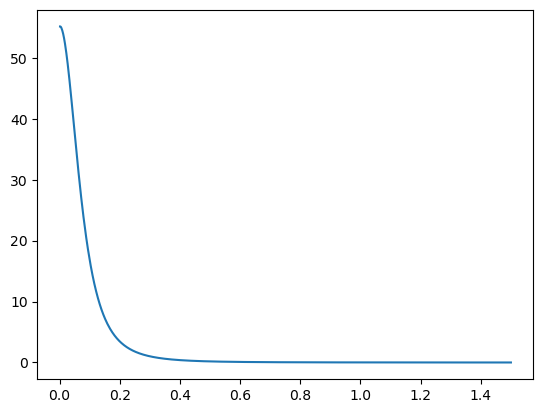

In [4]:
plt.plot(qlist, EVs[:,0])